In [10]:
# Upload the zipped dataset file (e.g., dataset.zip)
from google.colab import files
uploaded = files.upload()  # This will prompt you to choose your dataset zip file

import zipfile
import io

# Replace 'dataset.zip' with the name of your uploaded zip file if different.
zip_filename = 'dataset.zip'
if zip_filename in uploaded:
    with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
        # Extract the contents into a folder named 'dataset' under /content
        zip_ref.extractall('/content/dataset')
    print('Extraction completed!')
else:
    print(f'File "{zip_filename}" not found in the uploaded files. Please check the file name.')


Saving dataset.zip to dataset (1).zip
File "dataset.zip" not found in the uploaded files. Please check the file name.


In [13]:
import zipfile
import io # Remove the extra spaces/tabs at the beginning of this line

zip_filename = 'dataset.zip'  # Replace with your actual ZIP file name
if zip_filename in uploaded:
    with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
        zip_ref.extractall('/content/dataset.zip')
    print('Extraction completed!')
else:
    print(f'File "{zip_filename}" not found in the uploaded files. Please check the file name.')

File "dataset.zip" not found in the uploaded files. Please check the file name.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from google.colab import files

In [16]:
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [19]:
zip_filename = 'dataset.zip'  # Replace with your actual zip file name
zip_file_content = uploaded[zip_filename]  # Use zip_filename as the key

In [33]:
train: '/content/drive/MyDrive/dataset/train'
val:'/content/drive/MyDrive/dataset/valid'
test:'/content/drive/MyDrive/dataset/test'
nc: 2
names: ['accident', 'vehicle']

In [23]:
# ✅ Step 1: Install Ultralytics YOLOv8
!pip install ultralytics




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [34]:
DATASET_PATH = "/content/drive/MyDrive/dataset/data.yaml"  # Path to your YAML file

In [25]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 345MB/s]


In [ ]:
results = model(TEST_IMAGE)
results.show()
results.save("/content/detected.jpg")

In [ ]:
model.export(format="onnx")
model.export(format="torchscript")

In [35]:




# Set device for training (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the YOLOv8 model
model = YOLO("yolov8s.pt")

# Define the path to your YAML configuration file
DATASET_PATH = "/content/drive/MyDrive/dataset/data.yaml"  # Update with the correct path

# Update accident_data.yaml to reflect the correct paths:
#   Make sure your `accident_data.yaml` file looks like this:

train: '/content/drive/MyDrive/dataset/train'
val:'/content/drive/MyDrive/dataset/valid'
test:'/content/drive/MyDrive/dataset/test'
nc: 2
names: ['accident', 'vehicle']


# Train the model
model.train(
    data=DATASET_PATH,
    epochs=50,
    batch=16,
    imgsz=640,
    device=device,
    lr0=0.01,
    optimizer="SGD",
    patience=10,
    workers=4
)

# Validate the model
metrics = model.val()
print(metrics)



# Export the model
model.export(format="onnx")
model.export(format="torchscript")

Using device: cuda
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=

100%|██████████| 755k/755k [00:00<00:00, 27.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/train/labels... 662 images, 0 backgrounds, 0 corrupt: 100%|██████████| 662/662 [05:17<00:00,  2.09it/s]


train: New cache created: /content/drive/MyDrive/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset/valid/labels... 295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 295/295 [02:13<00:00,  2.21it/s]

val: New cache created: /content/drive/MyDrive/dataset/valid/labels.cache


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.79G      1.354      2.292      1.323         30        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        295       1007      0.524      0.525      0.499      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.58G        1.3      1.404      1.282         22        640: 100%|██████████| 42/42 [00:15<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        295       1007      0.544      0.554      0.542       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.6G      1.299      1.403      1.271         35        640: 100%|██████████| 42/42 [00:15<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        295       1007       0.51      0.534      0.502      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.63G      1.348      1.428      1.295         29        640: 100%|██████████| 42/42 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        295       1007       0.57      0.449      0.464       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.65G      1.332      1.381      1.304         15        640: 100%|██████████| 42/42 [00:16<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        295       1007      0.501      0.446      0.417      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.68G      1.352      1.323      1.304         31        640: 100%|██████████| 42/42 [00:15<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]

                   all        295       1007      0.625      0.515       0.54      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.7G      1.334      1.326      1.331         39        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]

                   all        295       1007      0.494      0.509      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.73G      1.351      1.305      1.347         32        640: 100%|██████████| 42/42 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        295       1007      0.574      0.489      0.483      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.75G      1.313      1.333      1.307         40        640: 100%|██████████| 42/42 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


                   all        295       1007       0.71      0.499      0.559      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.78G      1.352       1.33      1.314         33        640: 100%|██████████| 42/42 [00:15<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]


                   all        295       1007      0.589      0.585      0.586      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.8G      1.301      1.212      1.284         43        640: 100%|██████████| 42/42 [00:15<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


                   all        295       1007      0.591      0.503      0.465      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.82G      1.297       1.22      1.295         24        640: 100%|██████████| 42/42 [00:15<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        295       1007      0.641      0.514      0.532      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.85G       1.31      1.185      1.295         15        640: 100%|██████████| 42/42 [00:15<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        295       1007      0.635      0.531      0.587      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.87G       1.27      1.147      1.259         29        640: 100%|██████████| 42/42 [00:15<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        295       1007      0.535      0.428      0.439       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.9G      1.233      1.107       1.26         53        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]

                   all        295       1007      0.692      0.511      0.577      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.93G      1.236      1.146      1.255         13        640: 100%|██████████| 42/42 [00:15<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        295       1007      0.605      0.548      0.575      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.95G      1.241      1.098      1.249         21        640: 100%|██████████| 42/42 [00:15<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        295       1007      0.606      0.586      0.587      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.97G      1.227      1.083      1.249         29        640: 100%|██████████| 42/42 [00:15<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        295       1007      0.623      0.546      0.596      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.99G      1.193      1.007      1.219         21        640: 100%|██████████| 42/42 [00:17<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        295       1007      0.688      0.572      0.632      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.02G      1.176     0.9833      1.224         27        640: 100%|██████████| 42/42 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        295       1007      0.635      0.575      0.597       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.04G      1.173     0.9848      1.207         35        640: 100%|██████████| 42/42 [00:15<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        295       1007      0.648      0.578      0.616      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.07G      1.142      0.952      1.203         31        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]

                   all        295       1007      0.721      0.572      0.649      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.09G      1.143     0.9421      1.195         53        640: 100%|██████████| 42/42 [00:15<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        295       1007      0.693      0.592      0.636      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.12G       1.15     0.9114      1.188         23        640: 100%|██████████| 42/42 [00:15<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        295       1007      0.702      0.615      0.671      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.14G      1.102     0.9042       1.17         53        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        295       1007      0.665      0.566      0.619        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.16G      1.108     0.8926      1.177         21        640: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        295       1007      0.673      0.613      0.659      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.19G      1.067     0.8732      1.162         47        640: 100%|██████████| 42/42 [00:15<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


                   all        295       1007      0.708      0.626      0.675      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.21G      1.079     0.8429      1.147         21        640: 100%|██████████| 42/42 [00:15<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


                   all        295       1007      0.718      0.614      0.663      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.24G       1.08     0.8543      1.147         38        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]

                   all        295       1007      0.714      0.632      0.673      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.27G      1.058     0.8471      1.144         18        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        295       1007      0.671       0.66       0.69      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.29G      1.046     0.8228      1.141         33        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        295       1007      0.707      0.624      0.678      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.31G      1.049     0.8125      1.164         36        640: 100%|██████████| 42/42 [00:16<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        295       1007      0.734      0.633      0.691      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.33G      1.016     0.7678      1.122         19        640: 100%|██████████| 42/42 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]

                   all        295       1007       0.71      0.607       0.67      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.36G     0.9932      0.746      1.102         36        640: 100%|██████████| 42/42 [00:15<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        295       1007      0.729      0.621      0.684      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.38G     0.9908     0.7527      1.103         56        640: 100%|██████████| 42/42 [00:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        295       1007       0.66      0.669      0.695      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.41G     0.9657     0.7192      1.097         27        640: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        295       1007       0.69      0.639      0.691      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.43G     0.9435     0.7336      1.089         19        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        295       1007      0.727      0.633       0.69      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.46G     0.9629     0.6999       1.09         16        640: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        295       1007       0.71       0.68      0.706      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.48G     0.9365     0.6863      1.087         13        640: 100%|██████████| 42/42 [00:15<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        295       1007      0.709      0.637      0.685      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.51G     0.9157     0.6661      1.091         15        640: 100%|██████████| 42/42 [00:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        295       1007      0.724      0.658      0.688      0.469


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.53G     0.8903     0.6172      1.036          9        640: 100%|██████████| 42/42 [00:16<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        295       1007      0.719      0.642      0.684      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.56G     0.8737      0.562      1.021         13        640: 100%|██████████| 42/42 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]

                   all        295       1007      0.738      0.619      0.681      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.58G     0.8727     0.5752      1.021         25        640: 100%|██████████| 42/42 [00:14<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]

                   all        295       1007      0.735       0.64      0.697       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.61G      0.858     0.5583      1.025         12        640: 100%|██████████| 42/42 [00:16<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        295       1007       0.75      0.633       0.71      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.62G     0.8504     0.5464      1.011         16        640: 100%|██████████| 42/42 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]

                   all        295       1007      0.748      0.641      0.704      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.65G     0.8224     0.5254     0.9971         19        640: 100%|██████████| 42/42 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        295       1007      0.788       0.64      0.719      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.67G     0.8218     0.5158     0.9942         16        640: 100%|██████████| 42/42 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]

                   all        295       1007      0.746       0.66      0.721      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.7G     0.7936     0.5149     0.9912         18        640: 100%|██████████| 42/42 [00:14<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        295       1007      0.689      0.682      0.717      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.72G     0.8056     0.5018     0.9868         26        640: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        295       1007      0.742       0.66       0.72      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.75G     0.7796      0.494     0.9814         15        640: 100%|██████████| 42/42 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]

                   all        295       1007      0.724      0.677      0.723      0.508



50 epochs completed in 0.288 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 22.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


                   all        295       1007      0.723      0.677      0.723      0.509
              accident        201        214      0.759      0.841      0.861       0.67
               vehicle        212        793      0.686      0.513      0.585      0.348
Speed: 0.5ms preprocess, 4.7ms inference, 0.1ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train6
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 295/295 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]


                   all        295       1007      0.726      0.678      0.724      0.508
              accident        201        214      0.762      0.841      0.861       0.67
               vehicle        212        793       0.69      0.515      0.587      0.347
Speed: 2.5ms preprocess, 9.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train62
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ceb29624790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

'runs/detect/train6/weights/best.torchscript'


image 1/1 /content/car_9.jpg: 320x640 2 accidents, 4 vehicles, 43.7ms
Speed: 2.1ms preprocess, 43.7ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


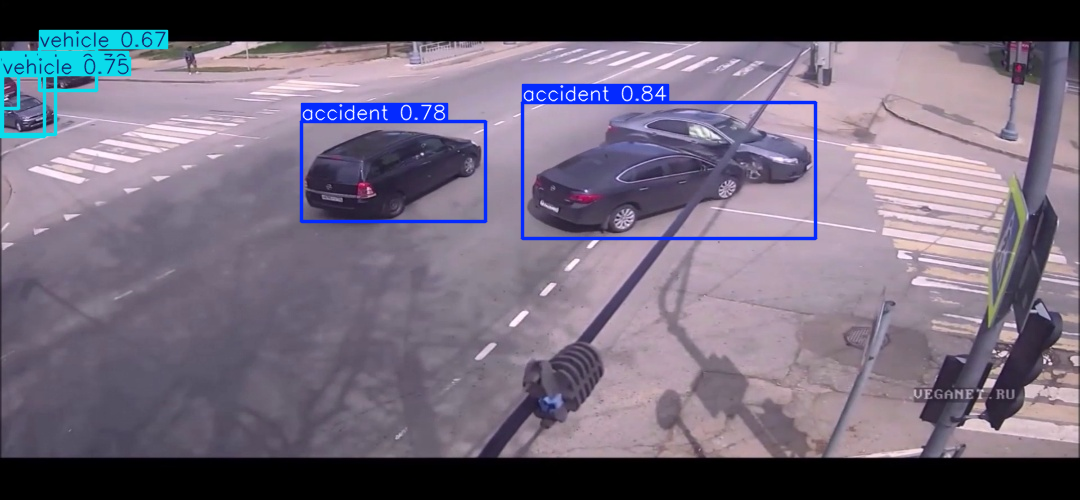

'/content/detected.jpg'

In [39]:
# Assuming TEST_IMAGE is a path to your test image. Please replace with the actual path.
TEST_IMAGE = "/content/car_9.jpg"
results = model(TEST_IMAGE)

# Access the first element of the results list, assuming it contains the predictions for the single image
results = results[0] # Get the prediction object for the single image.

results.show()
results.save("/content/detected.jpg")

In [42]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/yolo11n.pt')  # Replace with your model's path

# Evaluate the model's performance on the validation set
metrics = model.val(data=DATASET_PATH)  # Use the same DATASET_PATH as before

# Print the evaluation metrics
print(metrics)

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 295/295 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.16it/s]


                   all        295       1007     0.0258      0.192     0.0166    0.00906
                person        201        214    0.00524      0.336    0.00651    0.00368
               bicycle        212        793     0.0463     0.0479     0.0267     0.0144
Speed: 2.4ms preprocess, 4.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cea18ccf690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

In [46]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/yolo11n.pt')  # Replace with your model's path

# Evaluate the model's performance on the validation set
metrics = model.val(data=DATASET_PATH)  # Use the same DATASET_PATH as before

# Print all available keys in results_dict for inspection
print(metrics.results_dict.keys())

# Access and print mAP50-95 directly without indexing
# metrics.results_dict['metrics/mAP50-95(B)'] should already contain the scalar value
accuracy = metrics.results_dict['metrics/mAP50-95(B)'] * 100
print(f"accuracy mAP50-95: {accuracy:.2f}%")

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 295/295 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]


                   all        295       1007     0.0258      0.192     0.0166    0.00906
                person        201        214    0.00524      0.336    0.00651    0.00368
               bicycle        212        793     0.0463     0.0479     0.0267     0.0144
Speed: 3.8ms preprocess, 5.0ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val5
dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])
accuracy mAP50-95: 0.91%
